# 8. Neural networks and deep learning
Th|is week, we'll learn about neural nets and build a model for classifying images of clothes

## 8.1 Fashion classification
Dataset:

- Full: https://github.com/alexeygrigorev/clothing-dataset
- Small: https://github.com/alexeygrigorev/clothing-dataset-small


Links:

- https://cs231n.github.io/

## 8.2 TensorFlow and Keras
- Installing TensorFlow
- Loading images

TensorFlow is a powerful and flexible library for developing and training deep learning models, while Keras is a higher-level API that provides a user-friendly and intuitive interface for building and experimenting with neural networks. Keras is often used with TensorFlow as it simplifies many aspects of model development and makes it easier to create and train deep learning models.

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
path = '/kaggle/input/clothing-dataset-small/clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullpath = f'{path}/{name}'
fullpath

'/kaggle/input/clothing-dataset-small/clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

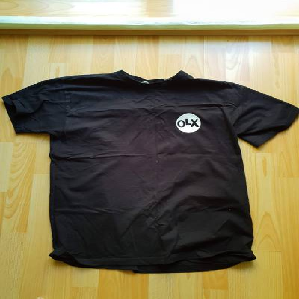

In [5]:
img = load_img(fullpath, target_size = (299, 299))
img

In [6]:
np.array(img)

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

- The image has a size of 299 pixels in height and 299 pixels in width, resulting in a total of 299 * 299 = 89,401 pixels.

- Each pixel in the image is described by three color channels, representing the intensity of red (R), green (G), and blue (B) colors. These three channels are used to represent and display the full range of colors in the image.

So, I have an image that is 299 pixels by 299 pixels, and each pixel is described by 3 channels for the RGB color information.

## 8.3 Pre-trained convolutional neural networks
- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [4]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 0s 0us/step


Here we are using `Xception` which is a pre-trained model for classifying image. This model is trained based on `imagenet` dataset.

In [10]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

`Xception` expect multiple image. Thats why we have to convert x to the array of images.

In [11]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 11s 11s/step


In [12]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n03595614', 'jersey', 0.681964),
  ('n02916936', 'bulletproof_vest', 0.038139928),
  ('n04370456', 'sweatshirt', 0.03432469),
  ('n03710637', 'maillot', 0.01135421),
  ('n04525038', 'velvet', 0.0018453539)]]

Now we have to decode the predictions. It determines the top 5 predicted class.

## 8.4 Convolutional neural networks
- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers
- There are more layers. Read here: https://cs231n.github.io/

# 8.5 Transfer learning
- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '/kaggle/input/clothing-dataset-small/clothing-dataset-small/train/',
    target_size = (150, 150),
    batch_size = 32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/kaggle/input/clothing-dataset-small/clothing-dataset-small/validation/',
    target_size = (150, 150),
    batch_size = 32,
    shuffle = False # By default, it shuffle the dataset. For validation dataset, no need to shuffle
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [7]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [8]:
X, y = next(train_ds)

In [9]:
X.shape, y.shape

((32, 150, 150, 3), (32, 10))

In [10]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [7]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/kaggle/input/clothing-dataset-small/clothing-dataset-small/validation/',
    target_size = (150, 150),
    batch_size = 32,
    shuffle = False
)

Found 341 images belonging to 10 classes.


#### Base model
Here we only take the convolutional Layers of `Xception` model which is developed based on `ImageNet`.

- `include_top` = `False`: This means, we only take the CLs. Exclude DLs
- `base_model.trainable` = `False`: This means, we use the model - Xception for extracting features only. We don't need to train. Using the CLs of Xception we extract vector representation of features
- `base_model` extract the vector representation.

In [12]:
base_model = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3)
)

base_model.trainable = False

83683744/83683744 [==============================] - 0s 0us/step


In [3]:
# Base Model (Xception)
base_model = Xception(
    weights = 'imagenet',  # Pre-trained weights from ImageNet
    include_top = False,    # Exclude top (classification) layers
    input_shape = (150, 150, 3)  # Input image shape
)

# Freeze the Base Model
base_model.trainable = False  # Freeze the convolutional layers

# Inputs
inputs = keras.Input(shape=(150, 150, 3))  # Define the input shape

# Base Model as Feature Extractor
base = base_model(inputs, training = False)
# Use the base model for feature extraction, not training

# Global Average Pooling Layer
vectors = keras.layers.GlobalAveragePooling2D()(base)
# Convert the 3D feature maps to a 1D feature vector

# Custom Dense Layer (Output Layer)
outputs = keras.layers.Dense(10)(vectors)
# Create a dense layer for classification with 10 classes

# Model Definition
model = keras.Model(inputs, outputs)
# Define the complete neural network model for training and inference

83683744/83683744 [==============================] - 1s 0us/step


In [14]:
preds = model.predict(X)
preds.shape

1/1 [==============================] - 11s 11s/step


(32, 10)

In [4]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [16]:
history = model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10
96/96 [==============================] - 30s 274ms/step - loss: 1.2802 - accuracy: 0.6711 - val_loss: 0.9579 - val_accuracy: 0.7595
Epoch 2/10
96/96 [==============================] - 10s 107ms/step - loss: 0.5744 - accuracy: 0.8246 - val_loss: 0.7808 - val_accuracy: 0.7742
Epoch 3/10
96/96 [==============================] - 10s 105ms/step - loss: 0.3797 - accuracy: 0.8680 - val_loss: 0.8323 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - 10s 108ms/step - loss: 0.2685 - accuracy: 0.9081 - val_loss: 0.8433 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 10s 107ms/step - loss: 0.1878 - accuracy: 0.9351 - val_loss: 0.8461 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 10s 105ms/step - loss: 0.1121 - accuracy: 0.9599 - val_loss: 1.0737 - val_accuracy: 0.7566
Epoch 7/10
96/96 [==============================] - 10s 104ms/step - loss: 0.0872 - accuracy: 0.9697 - val_loss: 0.8315 - val_accuracy: 0.8152

#### Optimizer

The optimizer adjusts the model's weights during training to find the best set of parameters that minimize the loss. Adam is one of the optimization algorithms used for this purpose, and it iteratively updates the weights to converge towards an optimal solution.

#### learning_rate

The learning rate determines the step size of weight updates during training. It's similar in concept to the "eta" parameter in algorithms like XGBoost.

#### loss

Optimizer changes the weight. Now how does it check if the modified weights give better results or not? Loss tells us how good the model is.

The loss function quantifies how well the model's predictions match the actual target values. It serves as a measure of the model's performance. For multi-class classification problems, Categorical Cross entropy is a common choice for the loss function. It calculates the error between predicted class probabilities and the actual class labels.

#### from_logits

The dense layer generates the raw score for each class. Then softmax takes these raw scores and converts them to probabilities for each group. If `from_logits=True`, we want the raw scores as output. Softmax won't be applied.

#### epochs

Total number of iteration over the training data. Setting `epochs = 10` means that you will train your model by iterating through the entire training dataset 10 times.


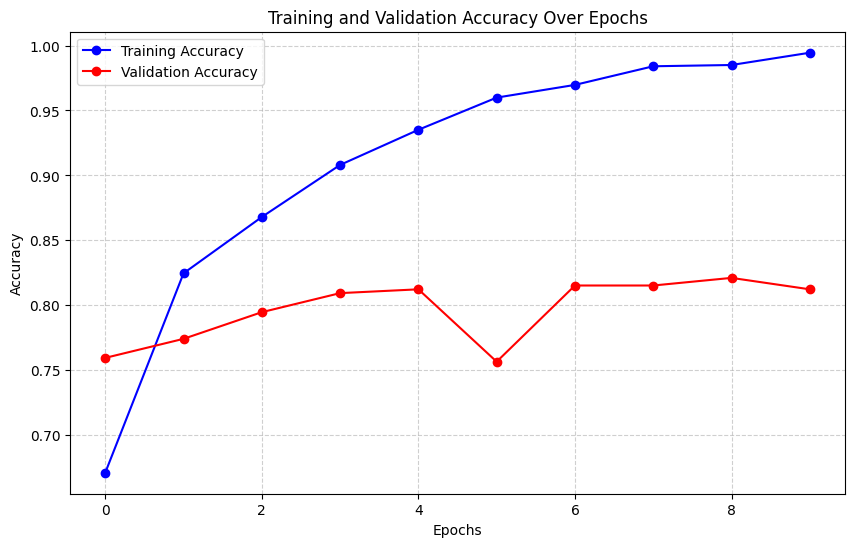

In [19]:
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(history.history['accuracy'],
         label='Training Accuracy',
         linestyle='-',
         marker='o',
         color='b')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'],
         label='Validation Accuracy',
         linestyle='-',
         marker='o',
         color='r')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')

# Add a grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.show()

# 8.6 Adjusting the learning rate
- What's the learning rate
- Trying different values


In [10]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [12]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 23s 212ms/step - loss: 1.9206 - accuracy: 0.3546 - val_loss: 1.5883 - val_accuracy: 0.4809
Epoch 2/10
96/96 [==============================] - 9s 91ms/step - loss: 1.3872 - accuracy: 0.5577 - val_loss: 1.2386 - val_accuracy: 0.5982
Epoch 3/10
96/96 [==============================] - 8s 88ms/step - loss: 1.1393 - accuracy: 0.6362 - val_loss: 1.0563 - val_accuracy: 0.6774
Epoch 4/10
96/96 [==============================] - 8s 85ms/step - loss: 0.9985 - accuracy: 0.6855 - val_loss: 0.9478 - val_accuracy: 0.7185
Epoch 5/10
96/96 [==============================] - 8s 85ms/step - loss: 0.9046 - accuracy: 0.7089 - val_loss: 0.8684 - val_accuracy: 0.7419
Epoch 6/10
96/96 [==============================] - 9s 89ms/step - loss: 0.8373 - accuracy: 0.7337 - val_loss: 0.8193 - val_accuracy: 0.7507
Epoch 7/10
96/96 [==============================] - 8s 88ms/step - loss: 0.7853 - accuracy: 0.7536 - val_loss: 0.7777 - val_accuracy: 0.7683
Epoc

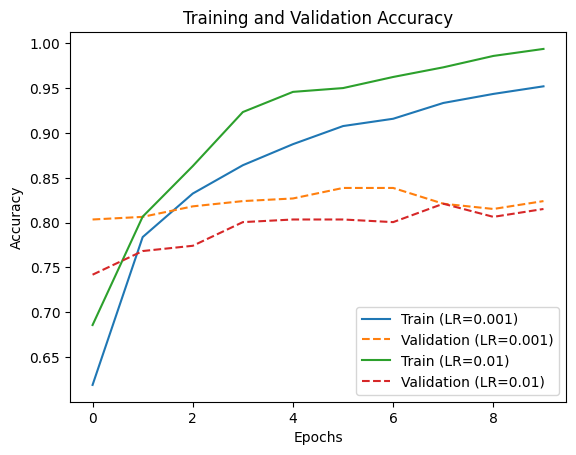

In [24]:
# Iterate over learning rates and their corresponding histories
for lr, hist in scores.items():
    # Plot training accuracy
    plt.plot(hist['accuracy'], label=f'Train (LR={lr})')

    # Plot validation accuracy
    plt.plot(hist['val_accuracy'], label=f'Validation (LR={lr})', linestyle='--')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plot
plt.show()

In [20]:
del scores[0.0001]
del scores[0.1]

# 8.7 Checkpointing
- Saving the best model only
- Training a model with callbacks
We can save the model after each iteration when certain condition is meet. We can do this using checkpoint.

In [7]:
model.save_weights('model_v1.h5', save_format = 'h5')

NameError: name 'model' is not defined

In [8]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(
    epoch = 23,
    val_accuracy = .453
)

'xception_v1_23_0.453.h5'

In [9]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

- `save_best_only = True:` When the model perform better than the previous model, then we save the model,
- `mode = max:` We want the validation accuracy to be maximize
- `monitor = val_accuracy:` If the `val_accuracy` at the end of an epoch is higher than the previous best accuracy (i.e., the maximum `val_accuracy` seen so far), the callback saves the model's weights to a file with the specified format, which includes the epoch number and validation accuracy.

In [10]:
def make_model(learning_rate=0.001):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [11]:
learning_rate = 0.001

model = make_model(learning_rate = learning_rate)

history = model.fit(
    train_ds,
    epochs = 10,
    validation_data = val_ds,
    callbacks = [checkpoint]
)

83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.0866 - accuracy: 0.6336

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 41s 279ms/step - loss: 1.0866 - accuracy: 0.6336 - val_loss: 0.7052 - val_accuracy: 0.7771
Epoch 2/10
96/96 [==============================] - 11s 110ms/step - loss: 0.6273 - accuracy: 0.7878 - val_loss: 0.6229 - val_accuracy: 0.8123
Epoch 3/10
96/96 [==============================] - 10s 102ms/step - loss: 0.5058 - accuracy: 0.8315 - val_loss: 0.5917 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 10s 105ms/step - loss: 0.4313 - accuracy: 0.8618 - val_loss: 0.5648 - val_accuracy: 0.8240
Epoch 5/10
96/96 [==============================] - 10s 106ms/step - loss: 0.3701 - accuracy: 0.8820 - val_loss: 0.5672 - val_accuracy: 0.8328
Epoch 6/10
96/96 [==============================] - 10s 103ms/step - loss: 0.3271 - accuracy: 0.9048 - val_loss: 0.5746 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 10s 104ms/step - loss: 0.2894 - accuracy: 0.9195 - val_loss: 0.5617 - val_accuracy: 0.8094
Epoch 8/10

# 8.8 Adding more layers
- Adding one innter dense layer
- Experimenting with different sizes of innter layer

In [12]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [13]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 14s 112ms/step - loss: 1.4357 - accuracy: 0.5176 - val_loss: 1.1088 - val_accuracy: 0.6305
Epoch 2/10
96/96 [==============================] - 10s 104ms/step - loss: 0.9856 - accuracy: 0.6509 - val_loss: 0.8839 - val_accuracy: 0.7067
Epoch 3/10
96/96 [==============================] - 10s 104ms/step - loss: 0.7828 - accuracy: 0.7278 - val_loss: 0.7488 - val_accuracy: 0.7654
Epoch 4/10
96/96 [==============================] - 10s 105ms/step - loss: 0.6465 - accuracy: 0.7907 - val_loss: 0.6927 - val_accuracy: 0.7859
Epoch 5/10
96/96 [==============================] - 10s 104ms/step - loss: 0.5626 - accuracy: 0.8191 - val_loss: 0.6963 - val_accuracy: 0.7742
Epoch 6/10
96/96 [==============================] - 10s 107ms/step - loss: 0.4372 - accuracy: 0.8690 - val_loss: 0.6157 - val_accuracy: 0.8006
Epoch 8/10
96/96 [==============================] - 10s 104ms/step - loss: 0.3878 - accuracy: 0.8814 - val_loss: 0.6065 - val_accuracy: 0.8

In [17]:
!rm -rf /kaggle/working/xception_v1_02_0.812.h5

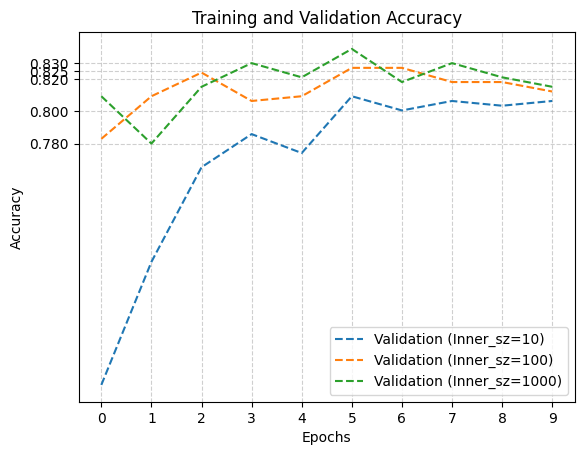

In [26]:
# Iterate over learning rates and their corresponding histories
for lr, hist in scores.items():
    # Plot training accuracy
#     plt.plot(hist['accuracy'], label=f'Train (Inner_sz={lr})')

    # Plot validation accuracy
    plt.plot(hist['val_accuracy'], label=f'Validation (Inner_sz={lr})', linestyle='--')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and Validation Accuracy')

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])

plt.legend()
# Add a grid
plt.grid(True, linestyle='--', alpha=0.6)
# Add a legend
plt.legend(loc='best')

# Show the plot
plt.show()

# 8.9 Regularization and dropout
- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [5]:
def make_model(learning_rate=0.01, size_inner=100, droprate = 0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [18]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate = droprate
    )
    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/20
96/96 [==============================] - 13s 101ms/step - loss: 0.9940 - accuracy: 0.6587 - val_loss: 0.6581 - val_accuracy: 0.7830
Epoch 2/20
96/96 [==============================] - 8s 88ms/step - loss: 0.5297 - accuracy: 0.8129 - val_loss: 0.6038 - val_accuracy: 0.7859
Epoch 3/20
96/96 [==============================] - 9s 89ms/step - loss: 0.3801 - accuracy: 0.8726 - val_loss: 0.5835 - val_accuracy: 0.8182
Epoch 4/20
96/96 [==============================] - 9s 91ms/step - loss: 0.2663 - accuracy: 0.9117 - val_loss: 0.5814 - val_accuracy: 0.7918
Epoch 5/20
96/96 [==============================] - 9s 93ms/step - loss: 0.2031 - accuracy: 0.9443 - val_loss: 0.5451 - val_accuracy: 0.8299
Epoch 6/20
96/96 [==============================] - 9s 88ms/step - loss: 0.1508 - accuracy: 0.9615 - val_loss: 0.5790 - val_accuracy: 0.8182
Epoch 7/20
96/96 [==============================] - 9s 88ms/step - loss: 0.1044 - accuracy: 0.9775 - val_loss: 0.5967 - val_accuracy: 0.8094
Epoch 8

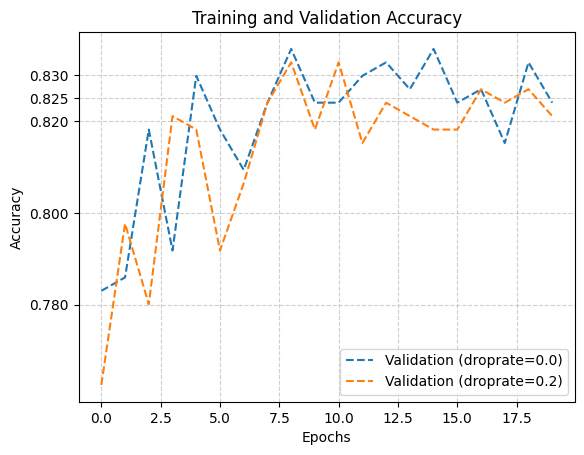

In [26]:
for dr, hist in scores.items():
#     plt.plot(hist['accuracy'], label=f'Train (droprate={dr})')
    
    plt.plot(hist['val_accuracy'], label=f'Validation (droprate={dr})', linestyle='--')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and Validation Accuracy')

# plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best')

plt.show()

In [22]:
del scores[0.5]

# 8.10 Data augmentation
Data augmentation is a technique used in machine learning to artificially increase the diversity of a training dataset by applying various transformations to the existing data.

In [6]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30, # select randomly [-30, 30]
    width_shift_range=10.0, # select randomly [-10, 10]
    height_shift_range=10.0, # select randomly [-10, 10]
    shear_range=10.0, 
    zoom_range=0.1, # select randomly [1-zoom_range, 1+zoom_range]
    horizontal_flip=False,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    '/kaggle/input/clothing-dataset-small/clothing-dataset-small/train/',
    target_size = (150, 150),
    batch_size = 32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/kaggle/input/clothing-dataset-small/clothing-dataset-small/validation/',
    target_size = (150, 150),
    batch_size = 32,
    shuffle = False # By default, it shuffle the dataset. For validation dataset, no need to shuffle
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [7]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate = droprate
)

history = model.fit(train_ds, epochs=100, validation_data=val_ds)

83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/100
96/96 [==============================] - 52s 444ms/step - loss: 1.4437 - accuracy: 0.5179 - val_loss: 0.8818 - val_accuracy: 0.6950
Epoch 2/100
96/96 [==============================] - 23s 244ms/step - loss: 1.0892 - accuracy: 0.6261 - val_loss: 0.7645 - val_accuracy: 0.7566
Epoch 3/100
96/96 [==============================] - 24s 246ms/step - loss: 0.9600 - accuracy: 0.6809 - val_loss: 0.7598 - val_accuracy: 0.7654
Epoch 4/100
96/96 [==============================] - 23s 242ms/step - loss: 0.8865 - accuracy: 0.7001 - val_loss: 0.7052 - val_accuracy: 0.7566
Epoch 5/100
96/96 [==============================] - 23s 242ms/step - loss: 0.8687 - accuracy: 0.7132 - val_loss: 0.6957 - val_accuracy: 0.7537
Epoch 6/100
96/96 [==============================] - 23s 239ms/step - loss: 0.7947 - accuracy: 0.7334 - val_loss: 0.6848 - val_accuracy: 0.7859
Epoch 7/100
96/96 [==============================] - 23s 240ms/step - l

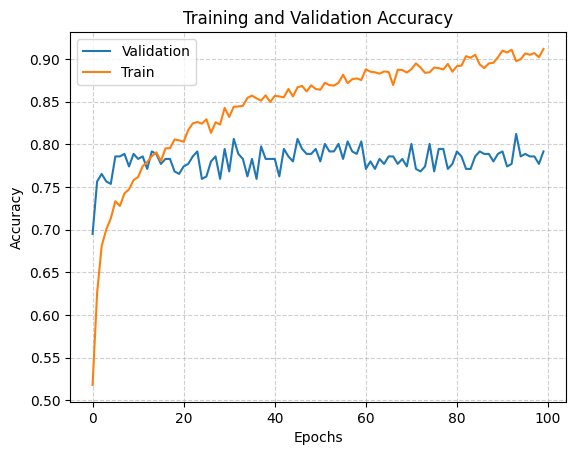

In [11]:
hist = history.history
plt.plot(hist['val_accuracy'], label='Validation')
plt.plot(hist['accuracy'], label='Train')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best')
plt.show()

# 8.11 Training a larger model
- Train a `299x299` model

In [3]:
def make_model(input_size = 150, learning_rate=0.01, size_inner=100, droprate = 0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )
    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [11]:
learning_rate = 0.0005
size = 100
droprate = 0.2
input_sz = 299

In [12]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     rotation_range=30,
#     width_shift_range=10.0,
#     height_shift_range=10.0,
    shear_range=10.0, 
    zoom_range=0.1,
    horizontal_flip=True,
#     vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    '/kaggle/input/clothing-dataset-small/clothing-dataset-small/train/',
    target_size = (input_sz, input_sz),
    batch_size = 32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/kaggle/input/clothing-dataset-small/clothing-dataset-small/validation/',
    target_size = (input_sz, input_sz),
    batch_size = 32,
    shuffle = False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [13]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [14]:
model = make_model(
    input_size = input_sz,
    learning_rate=learning_rate,
    size_inner=size,
    droprate = droprate
)

history = model.fit(
    train_ds,
    epochs = 50,
    validation_data = val_ds,
    callbacks = [checkpoint]
)

Epoch 1/50
96/96 [==============================] - 71s 702ms/step - loss: 1.0248 - accuracy: 0.6789 - val_loss: 0.5513 - val_accuracy: 0.8387
Epoch 2/50
96/96 [==============================] - 68s 704ms/step - loss: 0.5306 - accuracy: 0.8217 - val_loss: 0.4254 - val_accuracy: 0.8475
Epoch 3/50
96/96 [==============================] - 68s 707ms/step - loss: 0.4277 - accuracy: 0.8504 - val_loss: 0.3868 - val_accuracy: 0.8622
Epoch 4/50
96/96 [==============================] - 68s 712ms/step - loss: 0.3958 - accuracy: 0.8651 - val_loss: 0.3829 - val_accuracy: 0.8710
Epoch 5/50
96/96 [==============================] - 66s 687ms/step - loss: 0.3498 - accuracy: 0.8787 - val_loss: 0.3787 - val_accuracy: 0.8739
Epoch 6/50
96/96 [==============================] - 66s 687ms/step - loss: 0.3232 - accuracy: 0.8889 - val_loss: 0.3761 - val_accuracy: 0.8798
Epoch 7/50
96/96 [==============================] - 66s 687ms/step - loss: 0.2951 - accuracy: 0.8990 - val_loss: 0.3694 - val_accuracy: 0.8768

KeyboardInterrupt: 

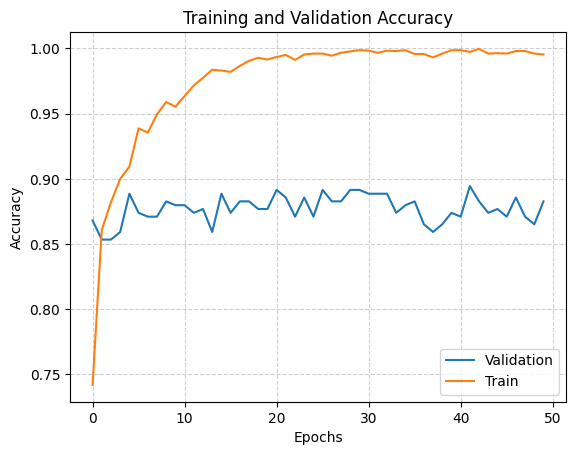

In [15]:
hist = history.history
plt.plot(hist['val_accuracy'], label='Validation')
plt.plot(hist['accuracy'], label='Train')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best')
plt.show()

# 8.12 Using the model
- Loading the model
- Evaluating the model
- Getting predictions

In [3]:
model = keras.models.load_model('/kaggle/input/xception-custom-model/xception_v4_12_0.897.h5')

In [4]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    '/kaggle/input/clothing-dataset-small/clothing-dataset-small/test/',
    target_size = (299, 299),
    batch_size = 32,
    shuffle = False
)

Found 372 images belonging to 10 classes.


In [5]:
model.evaluate(test_ds)

12/12 [==============================] - 83s 7s/step - loss: 0.2658 - accuracy: 0.8925


[0.2658449113368988, 0.8924731016159058]

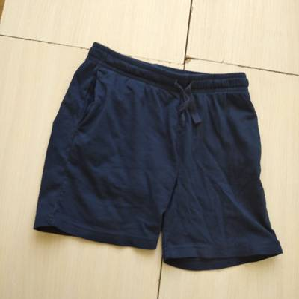

In [15]:
path = '/kaggle/input/clothing-dataset-small/clothing-dataset-small/test/shorts/2e6303c5-e8ef-4bb3-9ebc-ac97f3ab68d0.jpg'
img = load_img(path, target_size=(299, 299))
img

In [16]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [17]:
pred = model.predict(X)
pred[0]

1/1 [==============================] - 0s 24ms/step


array([-1.2744744, -3.531145 , -2.1829445, -1.1873441,  4.8023596,
       -2.427183 , -6.769211 , 10.680388 ,  4.262515 , -3.3428502],
      dtype=float32)

In [9]:
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [18]:
dict(zip(classes, pred[0]))

{'dress': -1.2744744,
 'hat': -3.531145,
 'longsleeve': -2.1829445,
 'outwear': -1.1873441,
 'pants': 4.8023596,
 'shirt': -2.427183,
 'shoes': -6.769211,
 'shorts': 10.680388,
 'skirt': 4.262515,
 't-shirt': -3.3428502}

# 8.13 Summary
- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
- First, train a small model `(150x150)` before training a big one `(299x299)`
- `Learning rate` - how fast the model trains. Fast learners aren't always the best ones
- We can save the best model using callbacks and checkpointing
- To avoid overfitting, use `dropout` and `augmentation`

# 8.14 Explore more
- Add more data, e.g. Zalando, etc (ADD LINKS)
- Albumentations - another way of generating augmentations
- Use PyTorch or MXNet instead of TensorFlow/Keras
- In addition to Xception, there are other architectures - try them
- Other projects:
    - cats vs dogs
    - Hotdog vs not hotdog
    - Category of images